In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## importing the libreries

This data is classification data. it is crop dataset which have the target column crop names.

In [2]:
## import pycaret library
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [4]:
## loading the data
df = pd.read_csv("/content/Crop_Recommendation.csv")
df.head()


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


<Axes: ylabel='Nitrogen'>

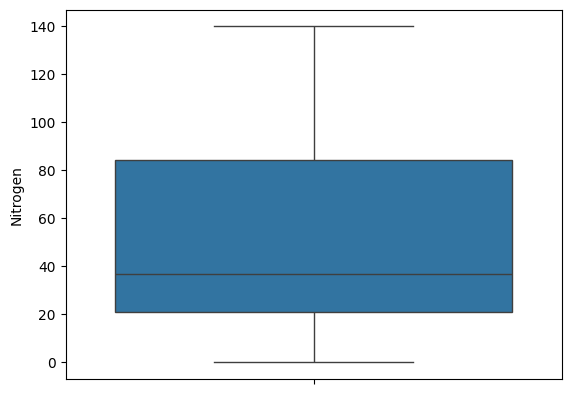

In [5]:
## data analysis (univariate)
import seaborn as sns
sns.boxplot(data=df,y="Nitrogen")

## having no outliers

<Axes: ylabel='Potassium'>

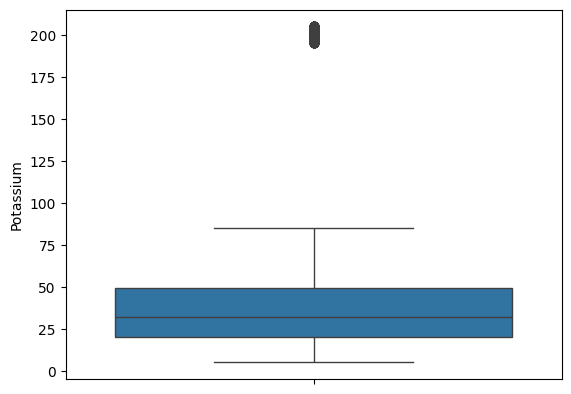

In [6]:
sns.boxplot(data=df,y="Potassium")
## having some outliers

<Axes: ylabel='Phosphorus'>

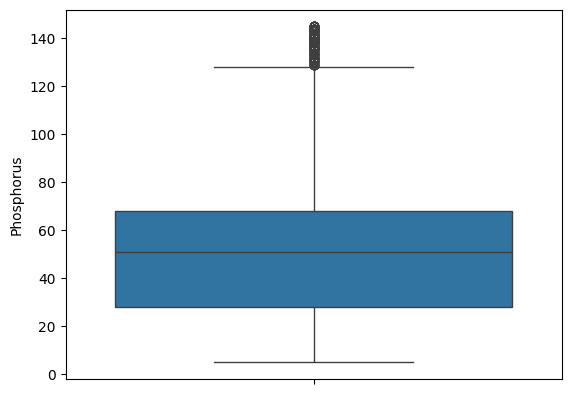

In [7]:
sns.boxplot(data=df,y="Phosphorus")
#having outlier

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Maize'),
  Text(2, 0, 'ChickPea'),
  Text(3, 0, 'KidneyBeans'),
  Text(4, 0, 'PigeonPeas'),
  Text(5, 0, 'MothBeans'),
  Text(6, 0, 'MungBean'),
  Text(7, 0, 'Blackgram'),
  Text(8, 0, 'Lentil'),
  Text(9, 0, 'Pomegranate'),
  Text(10, 0, 'Banana'),
  Text(11, 0, 'Mango'),
  Text(12, 0, 'Grapes'),
  Text(13, 0, 'Watermelon'),
  Text(14, 0, 'Muskmelon'),
  Text(15, 0, 'Apple'),
  Text(16, 0, 'Orange'),
  Text(17, 0, 'Papaya'),
  Text(18, 0, 'Coconut'),
  Text(19, 0, 'Cotton'),
  Text(20, 0, 'Jute'),
  Text(21, 0, 'Coffee')])

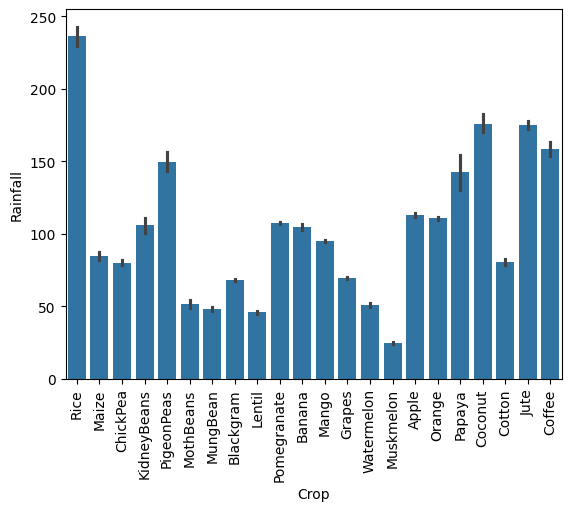

In [8]:
## bivariante analysis
## Category and numerical
sns.barplot(data=df,x="Crop",y="Rainfall",)
plt.xticks(rotation=90)
## rice crop are needed highest rain from all other crops

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Maize'),
  Text(2, 0, 'ChickPea'),
  Text(3, 0, 'KidneyBeans'),
  Text(4, 0, 'PigeonPeas'),
  Text(5, 0, 'MothBeans'),
  Text(6, 0, 'MungBean'),
  Text(7, 0, 'Blackgram'),
  Text(8, 0, 'Lentil'),
  Text(9, 0, 'Pomegranate'),
  Text(10, 0, 'Banana'),
  Text(11, 0, 'Mango'),
  Text(12, 0, 'Grapes'),
  Text(13, 0, 'Watermelon'),
  Text(14, 0, 'Muskmelon'),
  Text(15, 0, 'Apple'),
  Text(16, 0, 'Orange'),
  Text(17, 0, 'Papaya'),
  Text(18, 0, 'Coconut'),
  Text(19, 0, 'Cotton'),
  Text(20, 0, 'Jute'),
  Text(21, 0, 'Coffee')])

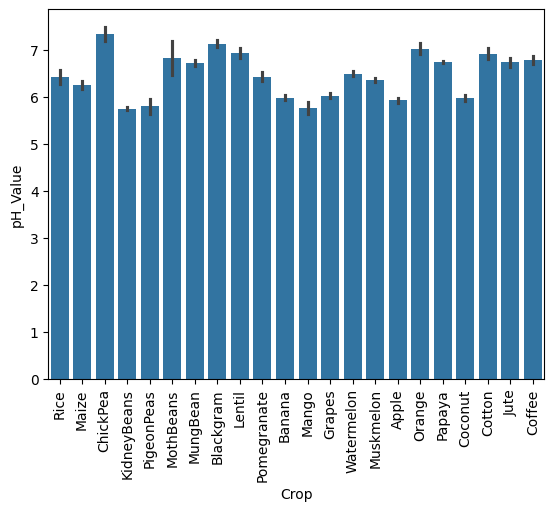

In [9]:
sns.barplot(data=df,x="Crop",y="pH_Value",)
plt.xticks(rotation=90)
## chick_pea need highest ph value of the soil

### Data Discription

-> this data is about the soil features to suggest which crop is suitable for the particular soil structure. in simple words it recommend crop according to the soil structure.
->the dataset features such as Nitrogen, Phosphorus, and Potassium levels, alongside environmental variables like Temperature, Humidity, pH_Value, and Rainfall.

In [10]:
df["Crop"].unique()
## the target column have multiple categories
## first we have to change into the numerical form then we can do machine learning

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [11]:
df["Crop"]=df["Crop"].map({'Rice':0, 'Maize':1, 'ChickPea':3, 'KidneyBeans':4, 'PigeonPeas':5,
       'MothBeans':6, 'MungBean':7, 'Blackgram':8, 'Lentil':9, 'Pomegranate':10,
       'Banana':11, 'Mango':12, 'Grapes':13, 'Watermelon':14, 'Muskmelon':15, 'Apple':16,
       'Orange':17, 'Papaya':18, 'Coconut':19, 'Cotton':20, 'Jute':21, 'Coffee':22})

In [12]:
df.head(3)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0


In [13]:
## analysing the target column
df["Crop"].value_counts()
## the data is balanced

Crop
0     100
1     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [14]:
df.isnull().sum()
## there is no null values
## no null values in the data

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [15]:
## some information about the data
## there are 2200 rows in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [16]:
from pycaret.classification import *
from pycaret.classification import setup, compare_models

s = setup(data=df, target="Crop")
cm = compare_models()

,Description,Value
0,Session id,6884
1,Target,Crop
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21"
4,Original data shape,"(2200, 8)"
5,Transformed data shape,"(2200, 8)"
6,Transformed train set shape,"(1540, 8)"
7,Transformed test set shape,"(660, 8)"
8,Numeric features,7
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9955,1.0000,0.9955,0.9961,0.9954,0.9952,0.9953,0.3900
nb,Naive Bayes,0.9948,1.0000,0.9948,0.9956,0.9948,0.9946,0.9946,0.0510
lightgbm,Light Gradient Boosting Machine,0.9935,0.9999,0.9935,0.9944,0.9935,0.9932,0.9932,3.9080
qda,Quadratic Discriminant Analysis,0.9922,0.0000,0.9922,0.9933,0.9921,0.9918,0.9919,0.0700
et,Extra Trees Classifier,0.9916,0.9999,0.9916,0.9928,0.9915,0.9912,0.9912,0.2580
xgboost,Extreme Gradient Boosting,0.9883,0.9998,0.9883,0.9896,0.9882,0.9878,0.9878,0.5350
dt,Decision Tree Classifier,0.9877,0.9935,0.9877,0.9894,0.9875,0.9871,0.9872,0.0550
gbc,Gradient Boosting Classifier,0.9851,0.0000,0.9851,0.9870,0.9851,0.9844,0.9845,8.5190
knn,K Neighbors Classifier,0.9792,0.9995,0.9792,0.9822,0.9791,0.9782,0.9784,0.1100
lr,Logistic Regression,0.9708,0.0000,0.9708,0.9740,0.9706,0.9694,0.9696,1.7970


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [17]:
## according to pycaret Random forest is the best
## lets see with nomalization and outlier detection
s2 = setup(data=df, target="Crop",
      remove_outliers = True, outliers_threshold = 0.05,
      normalize = True, normalize_method = 'zscore')
cm = compare_models()

,Description,Value
0,Session id,5372
1,Target,Crop
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21"
4,Original data shape,"(2200, 8)"
5,Transformed data shape,"(2123, 8)"
6,Transformed train set shape,"(1463, 8)"
7,Transformed test set shape,"(660, 8)"
8,Numeric features,7
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9942,1.0000,0.9942,0.9951,0.9940,0.9939,0.9939,0.7990
nb,Naive Bayes,0.9929,0.9999,0.9929,0.9936,0.9928,0.9925,0.9926,0.2530
lightgbm,Light Gradient Boosting Machine,0.9909,0.9999,0.9909,0.9923,0.9908,0.9905,0.9906,5.2500
qda,Quadratic Discriminant Analysis,0.9903,0.0000,0.9903,0.9912,0.9902,0.9898,0.9899,0.2040
et,Extra Trees Classifier,0.9896,0.9999,0.9896,0.9910,0.9895,0.9891,0.9892,0.4670
gbc,Gradient Boosting Classifier,0.9870,0.0000,0.9870,0.9894,0.9870,0.9864,0.9865,8.3710
xgboost,Extreme Gradient Boosting,0.9864,0.9999,0.9864,0.9887,0.9861,0.9857,0.9859,0.5090
dt,Decision Tree Classifier,0.9844,0.9918,0.9844,0.9861,0.9843,0.9837,0.9838,0.2130
knn,K Neighbors Classifier,0.9682,0.9981,0.9682,0.9735,0.9676,0.9667,0.9670,0.4100
lda,Linear Discriminant Analysis,0.9669,0.0000,0.9669,0.9720,0.9665,0.9653,0.9656,0.3460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Before outlier and normalization random forest is the best model and after doing outlier and normalization naive bayes is outperform.

In [18]:
## creating model naive bayes
rfModel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9870,0.9999,0.9870,0.9870,0.9870,0.9864,0.9864
1,0.9935,1.0000,0.9935,0.9943,0.9935,0.9932,0.9932
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9740,0.9999,0.9740,0.9807,0.9731,0.9728,0.9732
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9935,1.0000,0.9935,0.9943,0.9935,0.9932,0.9932
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9935,0.9999,0.9935,0.9943,0.9935,0.9932,0.9932


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
## selecting 20 rows in the data set to predict it
newDataSet = df.iloc[:20]

In [20]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9500,0,0,0,0,0.0000,0.0000


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,prediction_label,prediction_score
0,90,42,43,20.879744,82.002747,6.502985,202.935532,0,0,0.98
1,85,58,41,21.770462,80.319641,7.038096,226.655533,0,0,0.98
2,60,55,44,23.004459,82.320763,7.840207,263.964233,0,0,1.00
3,74,35,40,26.491096,80.158363,6.980401,242.864029,0,0,0.97
4,78,42,42,20.130175,81.604874,7.628473,262.717346,0,0,1.00
5,69,37,42,23.058048,83.370117,7.073453,251.054993,0,0,0.97
6,69,55,38,22.708838,82.639412,5.700806,271.324860,0,0,1.00
7,94,53,40,20.277744,82.894089,5.718627,241.974197,0,0,1.00
8,89,54,38,24.515881,83.535217,6.685347,230.446243,0,0,0.95
9,68,58,38,23.223974,83.033226,6.336254,221.209198,0,0,0.96


In [21]:
# sm = save_model(rfModel, 'rfModelFile')

# newPredictions.to_csv("NewPredictions.csv", index=False)       # Uncomment and run again
# #files.download('NewPredictions.csv')

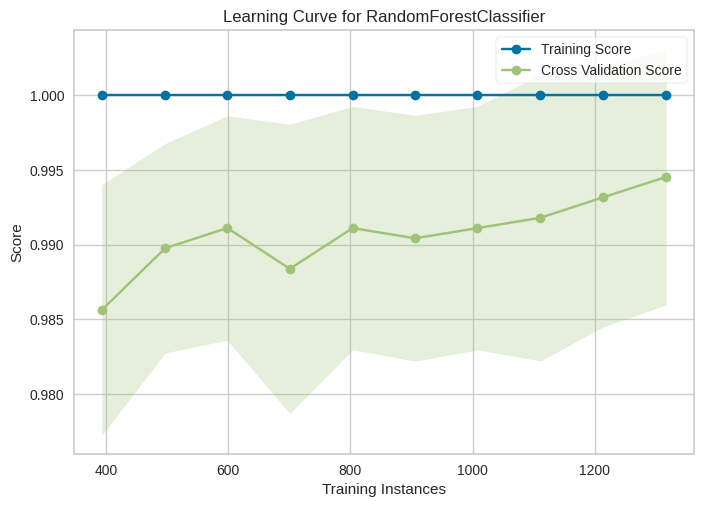

In [22]:
## now it time to evalute the model
plot_model(rfModel, plot='learning')

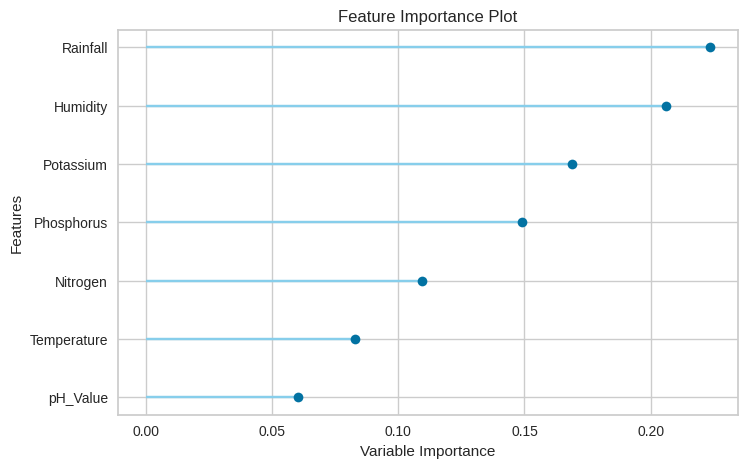

In [23]:
plot_model(rfModel, plot='feature')

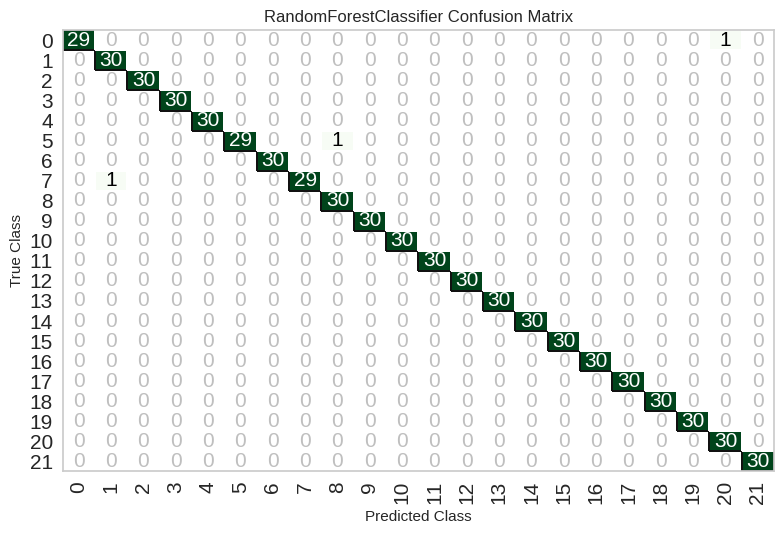

In [24]:
plot_model(rfModel, plot='confusion_matrix')

In [25]:
rfModelTuned = tune_model(rfModel, n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9870,0.9999,0.9870,0.9870,0.9870,0.9864,0.9864
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9740,1.0000,0.9740,0.9807,0.9731,0.9728,0.9732
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9870,1.0000,0.9870,0.9886,0.9869,0.9864,0.9865
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9870,0.9999,0.9870,0.9870,0.9870,0.9864,0.9864


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
rfModelTuned
## this parmaters are used for model traning.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=5372, verbose=0,
                       warm_start=False)

In [27]:
plot_model(rfModelTuned, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [28]:
## using naive bayes algorithm for prediction our data
nbModel = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9870,0.9997,0.9870,0.9870,0.9870,0.9864,0.9864
1,0.9935,0.9999,0.9935,0.9943,0.9935,0.9932,0.9932
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9805,1.0000,0.9805,0.9842,0.9802,0.9796,0.9798
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9935,1.0000,0.9935,0.9943,0.9935,0.9932,0.9932
6,0.9870,0.9999,0.9870,0.9870,0.9870,0.9864,0.9864
7,0.9935,1.0000,0.9935,0.9943,0.9935,0.9932,0.9932
8,0.9935,0.9998,0.9935,0.9943,0.9935,0.9932,0.9932


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
## predicti
newDataSet1 = df.iloc[:20]

In [32]:
newprediction =  predict_model(nbModel, data = newDataSet)
newprediction


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9500,0,0,0,0,0.0000,0.0000


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,prediction_label,prediction_score
0,90,42,43,20.879744,82.002747,6.502985,202.935532,0,0,0.9989
1,85,58,41,21.770462,80.319641,7.038096,226.655533,0,0,0.9998
2,60,55,44,23.004459,82.320763,7.840207,263.964233,0,0,1.0000
3,74,35,40,26.491096,80.158363,6.980401,242.864029,0,0,0.9998
4,78,42,42,20.130175,81.604874,7.628473,262.717346,0,0,1.0000
5,69,37,42,23.058048,83.370117,7.073453,251.054993,0,0,1.0000
6,69,55,38,22.708838,82.639412,5.700806,271.324860,0,0,1.0000
7,94,53,40,20.277744,82.894089,5.718627,241.974197,0,0,1.0000
8,89,54,38,24.515881,83.535217,6.685347,230.446243,0,0,0.9985
9,68,58,38,23.223974,83.033226,6.336254,221.209198,0,0,0.9968


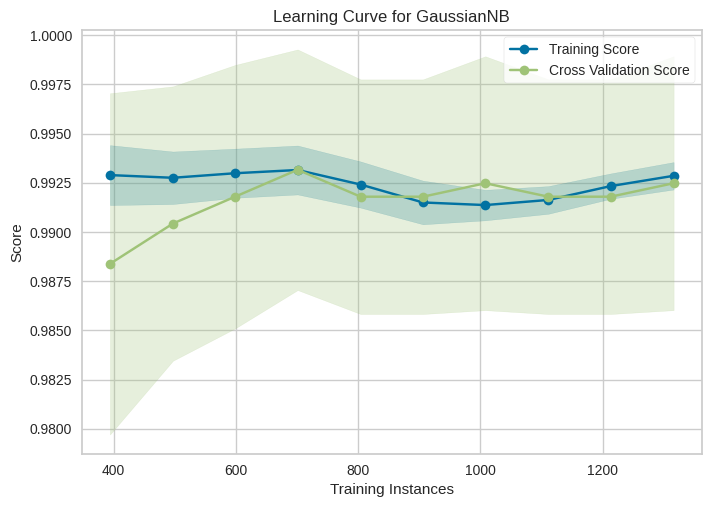

In [33]:
## evalution graph
plot_model(nbModel, plot='learning')

In [36]:
plot_model(nbModel, plot="parameter")

,Parameters
priors,None
var_smoothing,1e-09
